In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging as logging
import matplotlib.ticker as ticker

In [16]:
#not sure this is right
logging.basicConfig(filename='airportLog.log', filemode='w', level=logging.DEBUG, format='%(asctime)s %(message)s')
logging.debug('is when this event was logged.')
logging.info('is when this event was logged.')
logging.warning('is when this event was logged.')
logging.error('is when this event was logged.')

In [18]:
# import raw data and preview
airportRaw = pd.read_csv(r"C:\Users\britt\Documents\Python\airports\Airports.csv")
print(airportRaw.head())

   Rank                                            Airport  \
0     1       China Guangzhou Baiyun International Airport   
1     2  United States Hartsfield–Jackson Atlanta Inter...   
2     3      China Chengdu Shuangliu International Airport   
3     4  United States Dallas/Fort Worth International ...   
4     5        China Shenzhen Bao'an International Airport   

                             Location        Country      Code  Passengers  \
0  Baiyun-Huadu, Guangzhou, Guangdong          China  CAN/ZGGG    43760427   
1                    Atlanta, Georgia  United States  ATL/KATL    42918685   
2   Shuangliu-Wuhou, Chengdu, Sichuan          China  CTU/ZUUU    40741509   
3            Dallas-Fort Worth, Texas  United States  DFW/KDFW    39364990   
4         Bao'an, Shenzhen, Guangdong          China  SZX/ZGSZ    37916059   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020  


In [19]:
# check for missing values
count_nan = airportRaw.isna().sum().sum()
print('Count of missing values: ' + str(count_nan))

Count of missing values: 0


In [20]:
# add new column with region using dictionary

def assign_region_dict(country):
    country_to_region = {
        "China": "Asia",
        "Japan": "Asia",
        "Hong Kong SAR, China": "Asia",
        "India": "Asia",
        "Indonesia": "Asia",
        "Malaysia": "Asia",
        "Philippines": "Asia",
        "Qatar": "Asia",
        "Republic of Korea": "Asia",
        "Russia": "Asia",
        "Singapore": "Asia",
        "Taiwan": "Asia",
        "Thailand": "Asia",
        "United Arab Emirates": "Asia",
        "Turkey": "Asia",
        "Vietnam": "Asia",
        "Australia": "Oceania",
        "Brazil": "South America",
        "Canada": "North America",
        "France": "Europe",
        "Germany": "Europe",
        "Italy": "Europe",
        "Mexico": "North America",
        "Netherlands": "Europe",
        "Spain": "Europe",
        "The Netherlands": "Europe",
        "United Kingdom": "Europe",
        "United States": "North America"
    }
    
    return country_to_region.get(country, 'Unknown')
airportRaw['Region'] = airportRaw['Country'].apply(assign_region_dict)

In [7]:
# check region
print(airportRaw.head())

   Rank                                            Airport  \
0     1       China Guangzhou Baiyun International Airport   
1     2  United States Hartsfield–Jackson Atlanta Inter...   
2     3      China Chengdu Shuangliu International Airport   
3     4  United States Dallas/Fort Worth International ...   
4     5        China Shenzhen Bao'an International Airport   

                             Location        Country      Code  Passengers  \
0  Baiyun-Huadu, Guangzhou, Guangdong          China  CAN/ZGGG    43760427   
1                    Atlanta, Georgia  United States  ATL/KATL    42918685   
2   Shuangliu-Wuhou, Chengdu, Sichuan          China  CTU/ZUUU    40741509   
3            Dallas-Fort Worth, Texas  United States  DFW/KDFW    39364990   
4         Bao'an, Shenzhen, Guangdong          China  SZX/ZGSZ    37916059   

   Year         Region  
0  2020           Asia  
1  2020  North America  
2  2020           Asia  
3  2020  North America  
4  2020           Asia  


In [21]:
# group by region and year with sum of passengers

airportGroup = airportRaw.groupby(['Region', 'Year']).agg({'Passengers': ['sum']})
airportGroup.columns = ['total_pass']
airportGroup = airportGroup.reset_index()
print(airportGroup) # check 

           Region  Year  total_pass
0            Asia  2016  1222977731
1            Asia  2017  1341843067
2            Asia  2018  1357033821
3            Asia  2019  1396326936
4            Asia  2020   672659469
5          Europe  2016   487726815
6          Europe  2017   512258443
7          Europe  2018   536607947
8          Europe  2019   508190298
9          Europe  2020   101137367
10  North America  2016   971808000
11  North America  2017   961767308
12  North America  2018  1002089318
13  North America  2019  1035670356
14  North America  2020   390749031
15        Oceania  2016    41985810
16        Oceania  2017    43410355
17        Oceania  2018    44475976
18        Oceania  2019    44446838
19  South America  2020    20322520
20        Unknown  2018    68350784
21        Unknown  2019    71204153
22        Unknown  2020    38500935


In [22]:
Rlist = ["Asia", "Europe", "Oceania", "South America", "North America", "Unknown"]
print("Regions are: Asia, Europe, Oceania, South America, North America, Unknown")

while True:
    input_region = str(input("Enter a region from the list above: "))
    input_region = (input_region.title())
    if input_region == "Exit":
        break
    word_found = False
    for element in Rlist:
        try:
            if int(input_region) == int(element):
                word_found = True
                break
        except ValueError:
            if input_region == element:
                word_found = True
                break
    if word_found:
        print("You selected " + str(input_region))
        new_region = input_region
        break
    else:
        print("That is not a recognized region. Try again.")

Regions are: Asia, Europe, Oceania, South America, North America, Unknown
Enter a region from the list above: poop
That is not a recognized region. Try again.
Enter a region from the list above: north america
You selected North America


In [10]:
# filter data set to only show regions requested via user input
airportFilter = airportGroup.loc[(airportGroup['Region'] == new_region)]
print(airportFilter.head())


   Region  Year  total_pass
5  Europe  2016   487726815
6  Europe  2017   512258443
7  Europe  2018   536607947
8  Europe  2019   508190298
9  Europe  2020   101137367


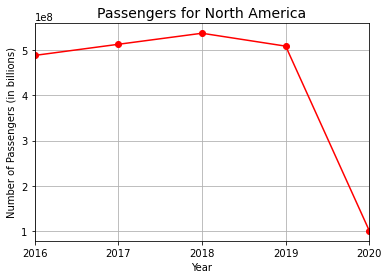

In [36]:
# line graph

plt.plot(airportFilter.Year, airportFilter.total_pass, color='red', marker='o')
plt.title('Passengers for ' + new_region, fontsize=14)
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.xlim(2016, 2020)
plt.xlabel('Year')
plt.ylabel('Number of Passengers (in billions)')
plt.grid(True)
plt.show()